In [1]:
#basic import
import pandas as pd
import numpy as np

#import library for data visulization
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
#read the data
amazon=pd.read_csv(r"E:\uc files\Reviews.csv")

In [3]:
amazon.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
#checking for null values
amazon.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [5]:
amazon.shape

(568454, 10)

In [42]:
#selecting usefull column
amazon=amazon.loc[:,["Text","Score"]]

In [53]:
amazon.head()

,Text,Score
0,i have bought several of the vitality canned d...,5
1,product arrived labeled as jumbo salted peanut...,1
2,this is a confection that has been around a fe...,4
3,if you are looking for the secret ingredient i...,2
4,great taffy at a great price. there was a wid...,5


In [43]:
#converting data into lower string
amazon.Text=amazon.Text.str.lower()

In [9]:
import nltk
from nltk.corpus import stopwords
abcd=stopwords.words("english")
len(abcd)

179

In [10]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [11]:
#function to remove stopwords and punctuation
def text_process(mess):
    nopunc=[char for char in mess if char not in string.punctuation]
    nopunc="".join(nopunc)
    
    return [word for word in nopunc.split() if word not in abcd]

In [15]:
#clean text after removing stopwords and punctuation
amazon.Text.apply(text_process)

0         [bought, several, vitality, canned, dog, food,...
1         [product, arrived, labeled, jumbo, salted, pea...
2         [confection, around, centuries, light, pillowy...
3         [looking, secret, ingredient, robitussin, beli...
4         [great, taffy, great, price, wide, assortment,...
                                ...                        
568449    [great, sesame, chickenthis, good, better, res...
568450    [im, disappointed, flavor, chocolate, notes, e...
568451    [stars, small, give, 1015, one, training, sess...
568452    [best, treats, training, rewarding, dog, good,...
568453    [satisfied, product, advertised, use, cereal, ...
Name: Text, Length: 568454, dtype: object

In [44]:
#CountVectorizer is used to get count of each unique word
from sklearn.feature_extraction.text import CountVectorizer
bow_transformer_amazon = CountVectorizer(analyzer=text_process).fit(amazon.Text)
bow_transformer_amazon.vocabulary_

{'bought': 35853,
 'several': 191822,
 'vitality': 229787,
 'canned': 42389,
 'dog': 69975,
 'food': 87178,
 'products': 172570,
 'found': 88439,
 'good': 95097,
 'quality': 175494,
 'product': 172319,
 'looks': 132308,
 'like': 130294,
 'stew': 204066,
 'processed': 172146,
 'meat': 137901,
 'smells': 196943,
 'better': 31724,
 'labrador': 127055,
 'finicky': 84279,
 'appreciates': 23171,
 'arrived': 24120,
 'labeled': 126909,
 'jumbo': 123456,
 'salted': 186507,
 'peanutsthe': 162708,
 'peanuts': 162675,
 'actually': 15808,
 'small': 196638,
 'sized': 195436,
 'unsalted': 225820,
 'sure': 208926,
 'error': 77444,
 'vendor': 228565,
 'intended': 119197,
 'represent': 181147,
 'confection': 55151,
 'around': 24002,
 'centuries': 45422,
 'light': 130073,
 'pillowy': 165753,
 'citrus': 50542,
 'gelatin': 92413,
 'nuts': 152671,
 'case': 44129,
 'filberts': 83750,
 'cut': 61668,
 'tiny': 218042,
 'squares': 202280,
 'liberally': 129661,
 'coated': 51757,
 'powdered': 169644,
 'sugar': 207

In [45]:
#creating TDM matrix
tdm_amazon=bow_transformer_amazon.transform(amazon["Text"])
tdm_amazon.shape

(568454, 240582)

In [54]:
#re-arranging score for better prediction 
amazon.Score=amazon.Score.replace({2:1})
amazon.Score=amazon.Score.replace({3:2})
amazon.Score=amazon.Score.replace({5:3,4:3})

In [55]:
#Dividing data into train and test dataset
from sklearn.model_selection import train_test_split
x_train_amazon,x_test_amazon,y_train_amazon,y_test_amazon=train_test_split(tdm_amazon,amazon.Score,test_size=0.2)

In [56]:
#building model on naive bayes
from sklearn.naive_bayes import MultinomialNB
nb_model= MultinomialNB()
nb_model.fit(x_train_amazon,y_train_amazon)

MultinomialNB()

In [57]:
#Prediction on test data
pred_amazon=nb_model.predict(x_test_amazon)

In [58]:
#Model performance metrics
from sklearn.metrics import confusion_matrix
tab_amazon=confusion_matrix(y_test_amazon,pred_amazon)
tab_amazon

array([[10751,   982,  4630],
       [ 1650,  2191,  4664],
       [ 3244,  2111, 83468]], dtype=int64)

In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_test_amazon,pred_amazon))

              precision    recall  f1-score   support

           1       0.69      0.66      0.67     16363
           2       0.41      0.26      0.32      8505
           3       0.90      0.94      0.92     88823

    accuracy                           0.85    113691
   macro avg       0.67      0.62      0.64    113691
weighted avg       0.83      0.85      0.84    113691



In [60]:
from wordcloud import WordCloud

In [61]:
bad=amazon[amazon.Score==1]
good=amazon[amazon.Score==3]

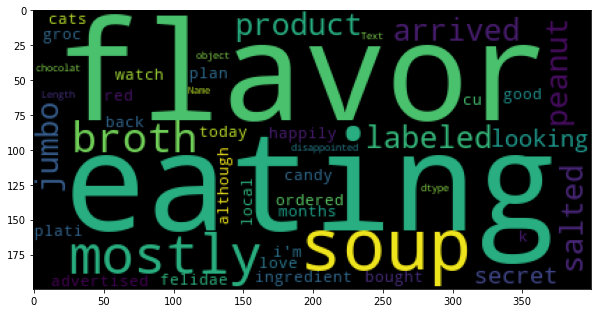

In [62]:
#common word representation for bad reviews
cloud=WordCloud(stopwords=abcd,max_words=50).generate(str(bad["Text"]))
plt.figure(figsize=(10,10))
plt.imshow(cloud)

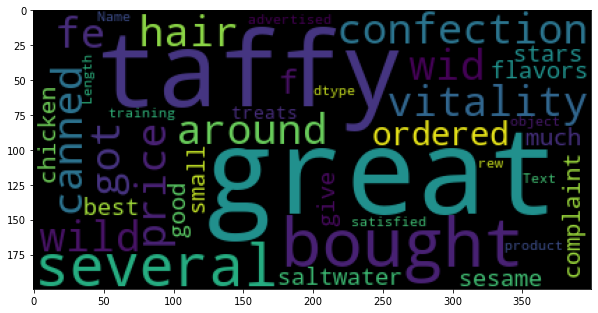

In [63]:
#common word representation for good reviews
cloud=WordCloud(stopwords=abcd,max_words=50).generate(str(good["Text"]))
plt.figure(figsize=(10,10))
plt.imshow(cloud)